**# ALGORITMO: ÁRBOL DE DECISIÓN**

Método de aprendizaje supervisado, utilizado para regresión y clasificación.

Mediante la caracterización de datos y a partir de reglas simples permite realizar la predicción de una variable.



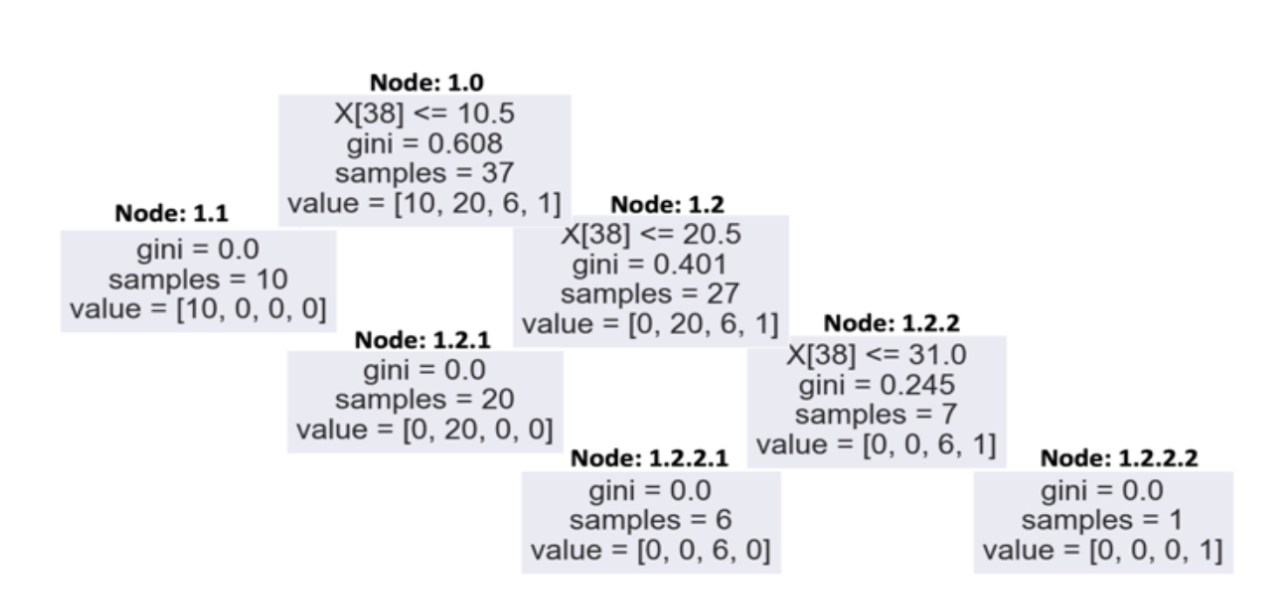


Ventajas



*   Requiere de poco procesamiento de datos
*   Permite la visualización de la arquitectura
*   Tiene la capacidad de llegar a la respuesta a través de múltiples caminos
*   Su validación se realiza mediante métricas de evaluación establecidas.
*   No requiere de un alto costo computacional





Desventajas:

*   Puede generar ramas que no generalicen los datos
*   Presenta inestabilidad por la variación de datos

In [1]:
#Numpy:  librería de Python especializada en el cálculo numérico y el análisis de datos.
import numpy as np

#Pandas: librería de Python especializada en el manejo y análisis de estructuras de datos.
import pandas as pd

#Matplotlib: librería de Python especializada en la creación de gráficos en dos dimensiones.
import matplotlib.pyplot as plt

#Seaborn: librería para Python que permite generar fácilmente elegantes gráficos.
import seaborn as sns

#Scikit-learn: biblioteca de Python ampliamente utilizada para el machine learning.

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataEMG = pd.read_csv('/content/drive/MyDrive/IA/Investigacion /EMG/datasetV2.csv')
dataEMG

,Media,Varianza,Desviacion,Rms,IEMG,LongitudFO,Estado
0,-0.000006,1.557382e-04,0.012480,0.012467,4.276611,1.011475,1
1,0.000046,1.556705e-04,0.012477,0.012464,4.273682,1.009521,1
2,0.000068,1.556433e-04,0.012476,0.012463,4.269775,1.010742,1
3,0.000062,1.556529e-04,0.012476,0.012464,4.271729,1.009521,1
4,0.000019,1.558645e-04,0.012485,0.012472,4.284912,1.015381,1
...,...,...,...,...,...,...,...
39560,-0.000307,1.114762e-06,0.001056,0.001098,0.390869,0.293457,0
39561,-0.000326,1.035173e-06,0.001017,0.001067,0.381104,0.277588,0
39562,-0.000246,1.163123e-06,0.001078,0.001105,0.407715,0.280029,0
39563,-0.000379,1.073104e-06,0.001036,0.001102,0.396973,0.304443,0


In [4]:
dataEMG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39565 entries, 0 to 39564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Media       39565 non-null  float64
 1   Varianza    39565 non-null  float64
 2   Desviacion  39565 non-null  float64
 3   Rms         39565 non-null  float64
 4   IEMG        39565 non-null  float64
 5   LongitudFO  39565 non-null  float64
 6   Estado      39565 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 2.1 MB


In [5]:
dataEMG['Estado'].unique()

array([1, 0])

In [6]:
dataEMG['Estado'].value_counts()

,count
Estado,
0,21381
1,18184


In [7]:
x = dataEMG.drop('Estado', axis = 1)

In [8]:
 y = dataEMG['Estado']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=1601)

In [10]:
net = DecisionTreeClassifier()
net.fit(x_train,y_train)
clf = net.fit(x_train,y_train)

In [11]:
predicciones = net.predict(x_test)

In [12]:
predicciones

array([1, 1, 0, ..., 0, 1, 0])

In [13]:
y_test

,Estado
15108,1
38429,0
26153,0
33159,0
12626,1
...,...
36156,0
38035,0
27367,0
3121,1


El classification_report de Scikit-learn genera un resumen de métricas clave para evaluar un modelo de clasificación. Estas métricas incluyen:

Precisión (Precision): Qué proporción de predicciones positivas son correctas.
Sensibilidad o Recall: Qué proporción de los casos positivos reales fueron identificados correctamente.
F1-Score: Promedio armónico de precisión y sensibilidad (balance entre ambos).
Soporte (Support): Número de instancias reales de cada clase.
Se utiliza para analizar el rendimiento del modelo por clase y proporciona una visión general de su desempeño.

In [14]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17100
           1       0.97      0.98      0.98     14552

    accuracy                           0.98     31652
   macro avg       0.98      0.98      0.98     31652
weighted avg       0.98      0.98      0.98     31652



La matriz de confusión es una herramienta para evaluar el desempeño de un modelo de clasificación. Es una tabla que compara las predicciones del modelo con los valores reales, mostrando el número de casos correctamente e incorrectamente clasificados.

In [15]:
print((y_test,predicciones))

(15108    1
38429    0
26153    0
33159    0
12626    1
        ..
36156    0
38035    0
27367    0
3121     1
28881    0
Name: Estado, Length: 31652, dtype: int64, array([1, 1, 0, ..., 0, 1, 0]))


[[16698   402]
 [  287 14265]]


<Axes: >

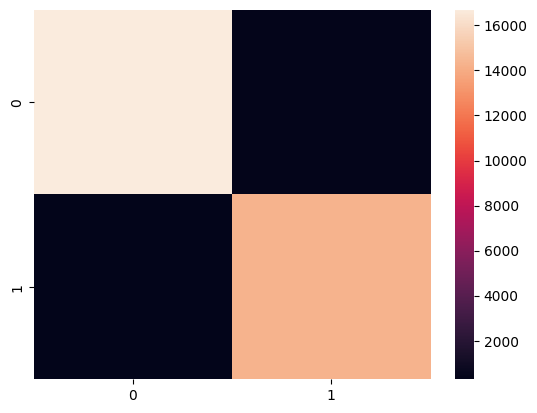

In [16]:
print(confusion_matrix(y_test, predicciones))
sns.heatmap(confusion_matrix(y_test, predicciones))

In [17]:
from sklearn import tree

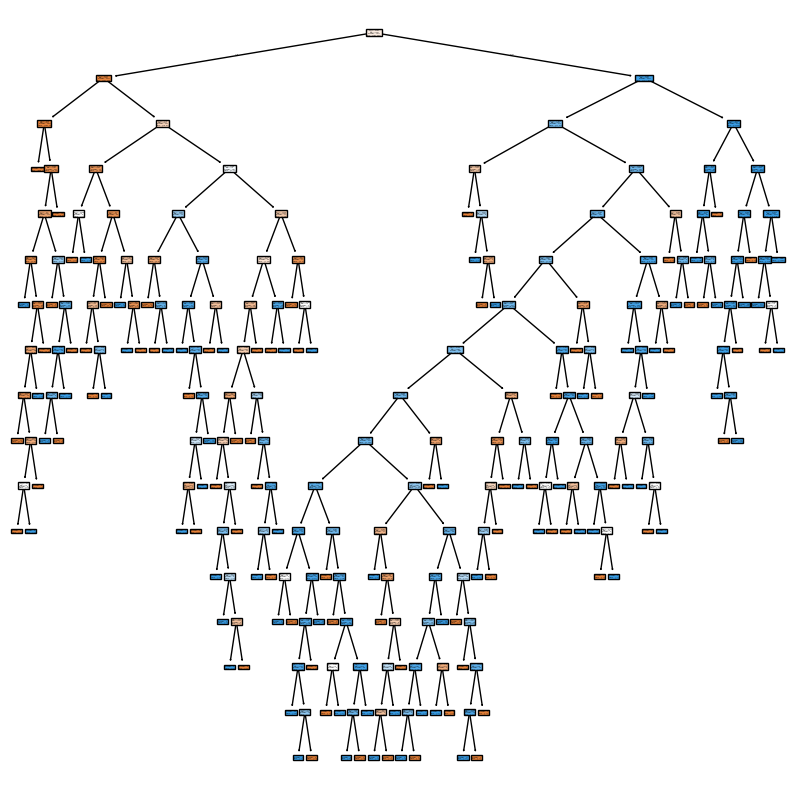

In [18]:
fig = plt.figure(figsize=(10, 10))
fig = tree.plot_tree(net, filled=True)

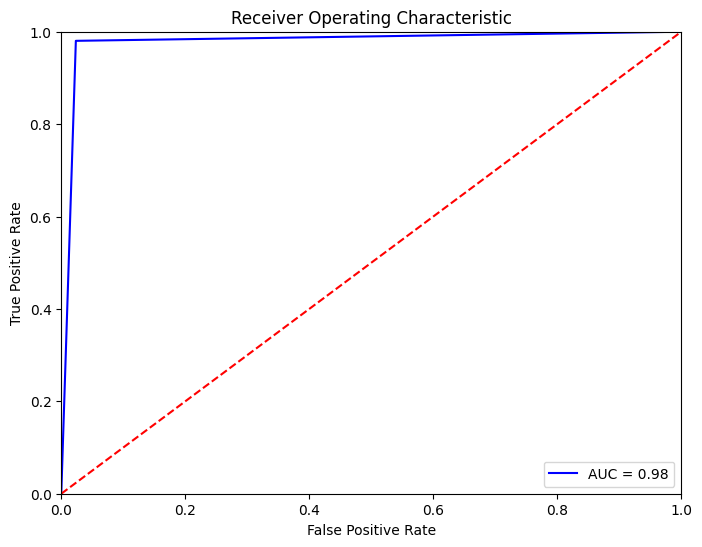

In [19]:
from sklearn.metrics import roc_curve, auc

# calculate the fpr and tpr for all thresholds of the classification
probs = net.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(8, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Inference time: 0.004577 seconds
Model memory consumption: 48 bytes
RAM usage: 298835968 bytes
Model disk space usage (exported): 22489 bytes


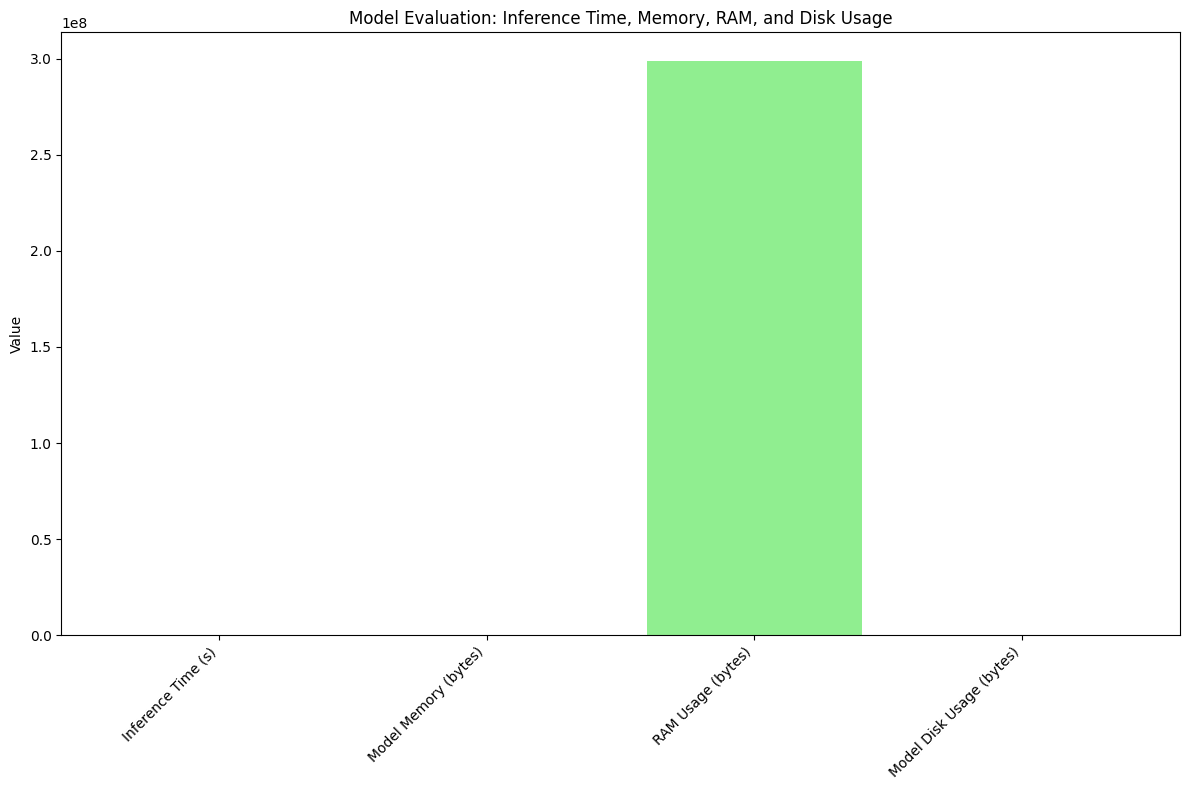

In [23]:
import time
import sys
import psutil
import os
import pickle

# Evaluate inference time
start_time = time.time()
predicciones_inference = net.predict(x_test)
end_time = time.time()
inference_time = end_time - start_time
print(f"Inference time: {inference_time:.6f} seconds")

# Evaluate memory consumption (approximate)
model_memory = sys.getsizeof(net)
print(f"Model memory consumption: {model_memory} bytes")

# Evaluate RAM usage
process = psutil.Process(os.getpid())
ram_usage = process.memory_info().rss  # in bytes
print(f"RAM usage: {ram_usage} bytes")

# Evaluate disk space usage of the exported model
model_filename = 'decision_tree_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(net, f)
disk_usage = os.path.getsize(model_filename) # in bytes
os.remove(model_filename) # remove the temporary file
print(f"Model disk space usage (exported): {disk_usage} bytes")


metrics = ['Inference Time (s)', 'Model Memory (bytes)', 'RAM Usage (bytes)', 'Model Disk Usage (bytes)']
values = [inference_time, model_memory, ram_usage, disk_usage]

plt.figure(figsize=(12, 8))
plt.bar(metrics, values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.ylabel('Value')
plt.title('Model Evaluation: Inference Time, Memory, RAM, and Disk Usage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()